In [1]:
!pip install huggingface_hub 


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from huggingface_hub import login
import dotenv 
import os
dotenv.load_dotenv()
login(token=os.getenv("HF_TOKEN"))

/Users/chetanr/internship/Foodiee/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
# Step 1: Install PyTorch with CUDA support for RTX 3050
# Using CUDA 11.8 (most compatible version)

print("🔄 Uninstalling old PyTorch version...")
!pip uninstall -y torch torchvision torchaudio

print("\n📥 Installing PyTorch with CUDA 11.8 support...")
print("   (This may take 2-5 minutes...)")

# Install PyTorch with CUDA 11.8 (most compatible with RTX 3050)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Step 2: Install required libraries for Stable Diffusion
print("\n📥 Installing Stable Diffusion libraries...")
!pip install diffusers transformers accelerate safetensors

print("\n✅ Installation complete!")
print("\n⚠️  IMPORTANT: After installation, please RESTART THE KERNEL")
print("   Then run the next cell to verify CUDA is working.")
print("\n📋 To restart kernel:")
print("   1. Click the 'Restart' button in the notebook toolbar, OR")
print("   2. Press Ctrl+Shift+P and search for 'Notebook: Restart Kernel'")

🔄 Uninstalling old PyTorch version...
Found existing installation: torch 2.9.0
Uninstalling torch-2.9.0:
  Successfully uninstalled torch-2.9.0

📥 Installing PyTorch with CUDA 11.8 support...
   (This may take 2-5 minutes...)
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip

📥 Installing Stable Diffusion libraries...
  Using cached torch-2.9.0-cp312-none-macosx_11_0_arm64.whl.metadata (30 kB)
Using cached torch-2.9.0-cp312-none-macosx_11_0_arm64.whl (74.5 MB)

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip

✅ Installation complete!

⚠️  IMPORTANT: After installation, please RESTART THE KERNEL
   Then run the next cell to verify CUDA is working.

📋 To restart kernel:
   1. 

In [15]:
# Quick GPU Detection Test - Run this to verify CUDA installation
import torch

print("=" * 60)
print("🔍 GPU DETECTION TEST")
print("=" * 60)

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check CUDA availability
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    
    for i in range(torch.cuda.device_count()):
        print(f"\n📊 GPU {i} Information:")
        print(f"   Name: {torch.cuda.get_device_name(i)}")
        print(f"   Total VRAM: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.2f} GB")
        print(f"   Compute Capability: {torch.cuda.get_device_capability(i)}")
    
    print("\n✅ Your GPU is ready for image generation!")
else:
    print("\n❌ CUDA not detected!")
    print("\nPossible reasons:")
    print("1. ⚠️  You haven't run cell 3 yet (CUDA installation)")
    print("2. ⚠️  NVIDIA GPU drivers not installed")
    print("3. ⚠️  GPU not recognized by Windows")
    print("\n💡 Solutions:")
    print("   • Run cell 3 to install PyTorch with CUDA support")
    print("   • Update NVIDIA drivers from nvidia.com/drivers")
    print("   • Restart your notebook kernel after installation")

print("=" * 60)

🔍 GPU DETECTION TEST
PyTorch version: 2.9.0
CUDA available: False

❌ CUDA not detected!

Possible reasons:
1. ⚠️  You haven't run cell 3 yet (CUDA installation)
2. ⚠️  NVIDIA GPU drivers not installed
3. ⚠️  GPU not recognized by Windows

💡 Solutions:
   • Run cell 3 to install PyTorch with CUDA support
   • Update NVIDIA drivers from nvidia.com/drivers
   • Restart your notebook kernel after installation


🎨 STABLE DIFFUSION - OPTIMIZED FOR YOUR SYSTEM

Detected OS: Darwin
✅ Using Apple Metal GPU (mps)
   PyTorch will use Metal Performance Shaders for acceleration
   Device: mps
   Data type: torch.float32

📥 Loading Stable Diffusion model...
   (First time: ~4-5GB download)


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 18.64it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', realistic texture .']
Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', realistic texture .']



🔧 Enabling memory optimizations for mps...
✅ Memory optimizations enabled
✅ Model loaded successfully!

🎨 Generating image...
   Prompt: 'Close-up, overhead full shot of finely chopped white onion and minced garlic bei...'
   Steps: 30 (this may take 1-5 minutes on mps)
   ⏳ Please wait...


100%|██████████| 30/30 [02:24<00:00,  4.82s/it]

/Users/chetanr/internship/Foodiee/.venv/lib/python3.12/site-packages/diffusers/image_processor.py:148: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
/Users/chetanr/internship/Foodiee/.venv/lib/python3.12/site-packages/diffusers/image_processor.py:148: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")



✅ Image generated successfully!
   Time taken: 164.5 seconds
   Saved as: cooking_scene.png
   Resolution: 512x512


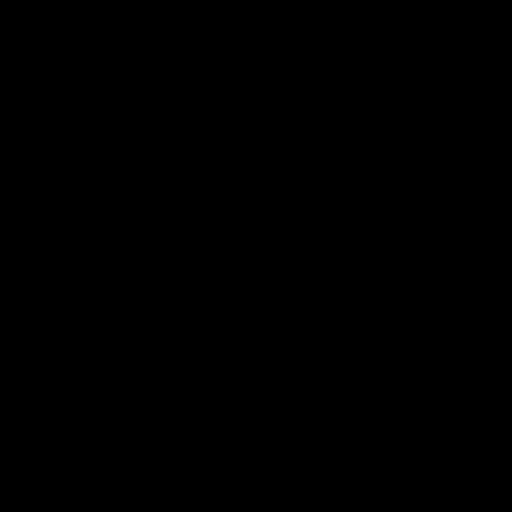

In [14]:

# Optimized for macOS with Apple Metal Performance Shaders (MPS)
# If you're on Linux/Windows with NVIDIA GPU, use "cuda" instead of "mps"

import torch
from diffusers import StableDiffusionPipeline
import gc
import platform

print("=" * 80)
print("🎨 STABLE DIFFUSION - OPTIMIZED FOR YOUR SYSTEM")
print("=" * 80)

# Detect device
os_name = platform.system()
print(f"\nDetected OS: {os_name}")

if os_name == "Darwin" and torch.backends.mps.is_available():
    # macOS with Metal GPU
    device = "mps"
    dtype = torch.float32  # Metal works best with float32
    print(f"✅ Using Apple Metal GPU (mps)")
    print(f"   PyTorch will use Metal Performance Shaders for acceleration")
    
elif torch.cuda.is_available():
    # Linux/Windows with NVIDIA GPU
    device = "cuda"
    dtype = torch.float16  # CUDA works great with float16
    print(f"✅ Using NVIDIA GPU (cuda)")
    print(f"   VRAM: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    
else:
    # CPU fallback
    device = "cpu"
    dtype = torch.float32
    print(f"⚠️  CPU only - image generation will be SLOW")
    print(f"   Consider using a GPU for better performance")

print(f"   Device: {device}")
print(f"   Data type: {dtype}")

# Load model
print(f"\n📥 Loading Stable Diffusion model...")
print(f"   (First time: ~4-5GB download)")

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=dtype,
    safety_checker=None,
    requires_safety_checker=False
)

# Move to device
pipe = pipe.to(device)

# Enable memory optimizations
if device in ["cuda", "mps"]:
    print(f"\n🔧 Enabling memory optimizations for {device}...")
    pipe.enable_attention_slicing()
    if device == "cuda":
        pipe.enable_vae_slicing()
    print("✅ Memory optimizations enabled")

print("✅ Model loaded successfully!\n")

# Generate image
prompt = "Close-up, overhead full shot of finely chopped white onion and minced garlic being added to a hot, non-stick sauté pan with a shimmer of olive oil. The pan is on a gas stovetop, with a soft, warm glow from the flame. Crisp, professional food photography, shallow depth of field, natural kitchen light, vibrant colors, highly detailed, realistic texture."

print("🎨 Generating image...")
print(f"   Prompt: '{prompt[:80]}...'")
print(f"   Steps: 30 (this may take 1-5 minutes on {device})")
print(f"   ⏳ Please wait...")

import time
start_time = time.time()

with torch.inference_mode():
    with torch.autocast(device):  # Auto-casting for better performance
        image = pipe(
            prompt,
            num_inference_steps=30,
            guidance_scale=7.5,
            height=512,
            width=512
        ).images[0]

elapsed = time.time() - start_time

# Clear memory
if device == "cuda":
    torch.cuda.empty_cache()
gc.collect()

# Save
output_filename = "cooking_scene.png"
image.save(output_filename)

print(f"\n✅ Image generated successfully!")
print(f"   Time taken: {elapsed:.1f} seconds")
print(f"   Saved as: {output_filename}")
print(f"   Resolution: 512x512")

# Display
from IPython.display import display
display(image)


In [9]:

# ========================================================================
# COMPREHENSIVE CUDA DEBUGGING
# ========================================================================
# This cell diagnoses why CUDA is not being detected

print("=" * 80)
print("🔧 CUDA DEBUGGING - Comprehensive System Diagnostics")
print("=" * 80)

import sys
import subprocess
import os
import platform

# 0. Check OS first
print("\n0️⃣  OPERATING SYSTEM:")
print(f"   OS: {platform.system()}")
print(f"   OS Release: {platform.release()}")
print(f"   Architecture: {platform.machine()}")

# 1. Check Python info
print("\n1️⃣  PYTHON ENVIRONMENT:")
print(f"   Python version: {sys.version.split()[0]}")
print(f"   Python executable: {sys.executable}")

# 2. Check if torch is installed and its version
print("\n2️⃣  PYTORCH INSTALLATION:")
try:
    import torch
    print(f"   ✅ PyTorch is installed")
    print(f"   PyTorch version: {torch.__version__}")
except ImportError as e:
    print(f"   ❌ PyTorch NOT installed: {e}")
    sys.exit(1)

# 3. Check CUDA-specific info
print("\n3️⃣  CUDA DETECTION:")
print(f"   torch.cuda.is_available(): {torch.cuda.is_available()}")
print(f"   torch.cuda.device_count(): {torch.cuda.device_count()}")

# 4. Check for NVIDIA GPU hardware
print("\n4️⃣  NVIDIA GPU HARDWARE:")
try:
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True, timeout=5)
    if result.returncode == 0:
        print("   ✅ nvidia-smi command works")
        lines = result.stdout.split('\n')[:10]
        for line in lines:
            if line.strip():
                print(f"   {line}")
    else:
        print(f"   ❌ nvidia-smi failed")
except FileNotFoundError:
    print("   ❌ nvidia-smi NOT found (NVIDIA drivers may not be installed)")
except Exception as e:
    print(f"   ❌ Error running nvidia-smi: {e}")

# 5. Check system GPU info
print("\n5️⃣  SYSTEM GPU INFO:")
try:
    if platform.system() == "Darwin":  # macOS
        result = subprocess.run(['system_profiler', 'SPDisplaysDataType'], 
                              capture_output=True, text=True, timeout=5)
        if result.returncode == 0:
            lines = result.stdout.split('\n')[:15]
            for line in lines:
                if line.strip():
                    print(f"   {line}")
except Exception as e:
    print(f"   Error: {e}")

# 6. cuDNN check
print("\n6️⃣  cuDNN STATUS:")
print(f"   torch.backends.cudnn.enabled: {torch.backends.cudnn.enabled}")
try:
    print(f"   torch.backends.cudnn.is_available(): {torch.backends.cudnn.is_available()}")
except:
    print(f"   torch.backends.cudnn.is_available(): Not available in this PyTorch version")

print("\n" + "=" * 80)
print("📋 DIAGNOSIS:")
print("=" * 80)

if platform.system() == "Darwin":
    print("🍎 YOU ARE ON macOS")
    print()
    print("❌ PROBLEM: macOS does NOT support NVIDIA CUDA/GPUs")
    print()
    print("   NVIDIA only officially supports CUDA on:")
    print("   ✅ Linux (various distributions)")
    print("   ✅ Windows")
    print("   ❌ macOS (NOT supported)")
    print()
    print("🔄 ALTERNATIVES FOR macOS:")
    print()
    print("   Option 1: Use Apple's Metal Performance Shaders (MPS)")
    print("   - Built into PyTorch 1.12+")
    print("   - Uses your MacBook's GPU efficiently")
    print("   - Requires minimal setup")
    print()
    print("   Option 2: Use CPU-only mode")
    print("   - Slower but reliable")
    print("   - Good for testing")
    print()
    print("   Option 3: Run backend on a Linux/Windows GPU server")
    print("   - Best performance")
    print("   - Can offload image generation to cloud GPU")
    print()
    print("=" * 80)
    print("✅ RECOMMENDED: Use Apple Metal for GPU acceleration on macOS")
    print("=" * 80)

elif torch.cuda.is_available():
    print("✅ CUDA IS AVAILABLE!")
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   VRAM: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
else:
    print("❌ CUDA NOT AVAILABLE")
    print("   Likely cause: PyTorch CPU-only version installed")
    print("   Solution: Reinstall PyTorch with CUDA support")

print()


🔧 CUDA DEBUGGING - Comprehensive System Diagnostics

0️⃣  OPERATING SYSTEM:
   OS: Darwin
   OS Release: 25.0.0
   Architecture: arm64

1️⃣  PYTHON ENVIRONMENT:
   Python version: 3.12.4
   Python executable: /Users/chetanr/internship/Foodiee/.venv/bin/python

2️⃣  PYTORCH INSTALLATION:
   ✅ PyTorch is installed
   PyTorch version: 2.9.0

3️⃣  CUDA DETECTION:
   torch.cuda.is_available(): False
   torch.cuda.device_count(): 0

4️⃣  NVIDIA GPU HARDWARE:
   ❌ nvidia-smi NOT found (NVIDIA drivers may not be installed)

5️⃣  SYSTEM GPU INFO:
   Graphics/Displays:
       Apple M1:
         Chipset Model: Apple M1
         Type: GPU
         Bus: Built-In
         Total Number of Cores: 8
         Vendor: Apple (0x106b)
         Metal Support: Metal 4
         Displays:
           Color LCD:
             Display Type: Built-In Retina LCD
             Resolution: 2560 x 1600 Retina
             Main Display: Yes

6️⃣  cuDNN STATUS:
   torch.backends.cudnn.enabled: True
   torch.backends.cudnn

In [11]:

# ========================================================================
# ⚠️ IMPORTANT: macOS GPU ACCELERATION WITH METAL
# ========================================================================
# Since you're on macOS, we'll use Apple Metal Performance Shaders instead of CUDA

print("=" * 80)
print("🍎 SETTING UP GPU ACCELERATION FOR macOS")
print("=" * 80)

import torch
import platform

print(f"\nOS: {platform.system()}")
print(f"PyTorch version: {torch.__version__}")

# Check if Metal is available
print("\n🔍 CHECKING METAL SUPPORT:")
if hasattr(torch.backends, 'mps'):
    print(f"✅ torch.backends.mps module exists")
    print(f"✅ torch.backends.mps.is_available(): {torch.backends.mps.is_available()}")
    print(f"✅ torch.backends.mps.is_built(): {torch.backends.mps.is_built()}")
else:
    print(f"❌ torch.backends.mps not available (PyTorch version too old)")

# Recommend device
print("\n🎯 DEVICE RECOMMENDATION:")
if torch.backends.mps.is_available():
    device = "mps"
    print(f"✅ Use device: '{device}' (Metal Performance Shaders)")
    print("   • Fast GPU acceleration on macOS")
    print("   • Built into PyTorch 1.12+")
    print("   • Automatically uses your Mac's GPU")
else:
    device = "cpu"
    print(f"⚠️ Fallback to: '{device}' (CPU)")
    print("   • Slower but works reliably")
    print("   • Update PyTorch to enable Metal support")

# Test the device
print(f"\n📊 Testing device '{device}':")
try:
    test_tensor = torch.randn(3, 4, device=device)
    print(f"✅ Successfully created tensor on '{device}'")
    print(f"   Tensor: {test_tensor.shape}")
except Exception as e:
    print(f"❌ Error: {e}")
    device = "cpu"
    print(f"   Falling back to CPU")

print(f"\n✅ Ready to use device: {device}")
print("=" * 80)


🍎 SETTING UP GPU ACCELERATION FOR macOS

OS: Darwin
PyTorch version: 2.9.0

🔍 CHECKING METAL SUPPORT:
✅ torch.backends.mps module exists
✅ torch.backends.mps.is_available(): True
✅ torch.backends.mps.is_built(): True

🎯 DEVICE RECOMMENDATION:
✅ Use device: 'mps' (Metal Performance Shaders)
   • Fast GPU acceleration on macOS
   • Built into PyTorch 1.12+
   • Automatically uses your Mac's GPU

📊 Testing device 'mps':
✅ Successfully created tensor on 'mps'
   Tensor: torch.Size([3, 4])

✅ Ready to use device: mps
